In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.version

import yfinance as yf
yf.pdr_override()
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
stocks = yf.download("VTI SPY VOO VXUS BND", start="2010-12-31", end="2021-01-30")
adj_close = stocks['Adj Close']
adj_close.head()

[*********************100%***********************]  5 of 5 completed


,BND,SPY,VOO,VTI,VXUS
Date,,,,,
2010-12-31,60.893539,103.053917,94.675804,53.566647,NaN
2011-01-03,60.817699,104.119293,95.563873,54.119396,NaN
2011-01-04,60.825283,104.061905,95.481636,54.012138,NaN
2011-01-05,60.559765,104.602806,95.991425,54.309158,NaN
2011-01-06,60.612873,104.397934,95.826988,54.185398,NaN


<AxesSubplot:>

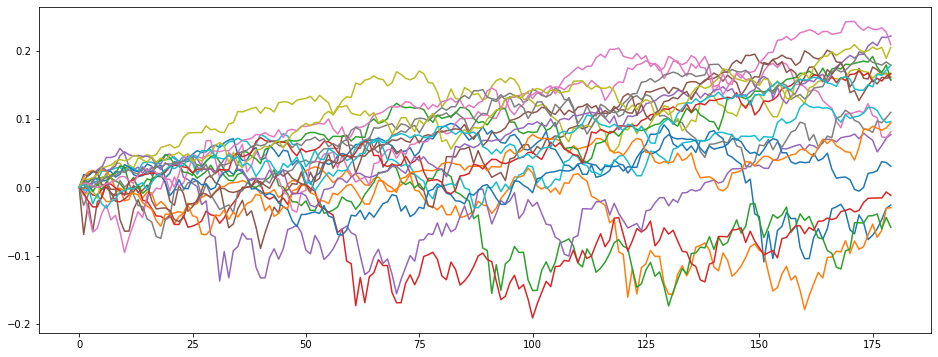

In [4]:
def dollar_cost_avg_test(symbol, measured_days, step_size, trials):
    from collections import defaultdict

    assert isinstance(symbol, pd.DataFrame), "DataFrame is required for input"
    assert len(symbol.columns) == 1, "Can only support one symbol at a time."
    # assert isinstance(start_date, str)
    # assert isinstance(end_date, str)
    assert isinstance(measured_days, int)
    assert isinstance(step_size, int)

    #start and end dates need to be on a trading day
    start_date = '2012-01-06'
    end_date = '2021-01-29'
    max_end_date = str((symbol.index[len(symbol)-measured_days]).date())
    tests = defaultdict(list)

    for i in range(0,trials):
        test = symbol.iloc[0+i*step_size:measured_days+i*step_size,0].reset_index().iloc[:,1]
        test = test/test[0] - 1
        tests[i] = test
    return pd.DataFrame(tests)

symbol = stocks['Adj Close'][['VTI']]

result = dollar_cost_avg_test(symbol = symbol,
    measured_days = 180,
    step_size = 30,
    trials = 20)
    
result.plot(figsize=(16,6), legend = False)

<AxesSubplot:>

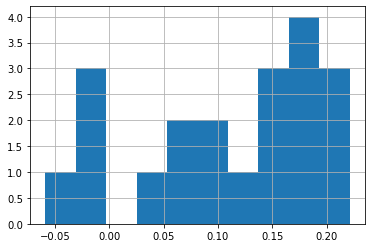

In [5]:
result.iloc[len(result)-1].hist()